In [2]:
import pandas as pd

In [3]:
csv_path = 'employee_churn_data.csv'
turnover_df = pd.read_csv(csv_path)
turnover_df.head()

department  promoted    review  projects  salary  tenure  satisfaction  \
0  operations         0  0.577569         3     low     5.0      0.626759   
1  operations         0  0.751900         3  medium     6.0      0.443679   
2     support         0  0.722548         3  medium     6.0      0.446823   
3   logistics         0  0.675158         4    high     8.0      0.440139   
4       sales         0  0.676203         3    high     5.0      0.577607   

   bonus  avg_hrs_month left  
0      0     180.866070   no  
1      0     182.708149   no  
2      0     184.416084   no  
3      0     188.707545   no  
4      1     179.821083   no

In [4]:
turnover_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [6]:
# Step 1: Convert 'left' to binary
#turnover_df['left'] = turnover_df['left'].replace({'yes': 1, 'no': 0})
turnover_df['left'] = turnover_df['left'].apply(lambda x: 1 if x == 'yes' else 0)

# Step 2: Encode categorical variables
data_encoded = pd.get_dummies(turnover_df, columns=['department', 'salary'])

# Separate features and target variable
X = data_encoded.drop('left', axis=1)
y = data_encoded['left']

# Step 3: Scaling numerical features - identify numerical columns first (excluding 'promoted' and 'bonus' as they are binary)
numerical_features = ['review', 'projects', 'tenure', 'satisfaction', 'avg_hrs_month']
scaler = StandardScaler()

# Apply scaling only to numerical features
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model building and evaluation
model = LogisticRegression(max_iter=1000)  # Using a higher number of iterations for convergence
model.fit(X_train, y_train)

# Predicting and evaluating on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(accuracy) 
print(classification_report_output)

0.7358490566037735
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1330
           1       0.67      0.25      0.37       578

    accuracy                           0.74      1908
   macro avg       0.71      0.60      0.60      1908
weighted avg       0.72      0.74      0.69      1908



In [18]:
y_pred3 = model.predict(X_train)
accuracy2 = accuracy_score(y_train, y_pred3)
classification_test = classification_report(y_train, y_pred3)

print(accuracy2)
print(classification_test)

0.7333595387840671
              precision    recall  f1-score   support

           0       0.75      0.94      0.83      5426
           1       0.60      0.23      0.33      2206

    accuracy                           0.73      7632
   macro avg       0.68      0.58      0.58      7632
weighted avg       0.71      0.73      0.69      7632



In [7]:
X_train

promoted    review  projects    tenure  satisfaction  bonus  \
5875         0 -1.091384 -0.474599  1.020106      0.405755      0   
5006         0 -0.607243  1.252203  1.020106     -0.798322      0   
81           0 -0.129692  1.252203 -0.392964      0.768927      0   
1323         0 -0.356061 -0.474599  0.313571      0.932455      1   
9514         0  0.153435 -0.474599  1.020106     -0.370308      0   
...        ...       ...       ...       ...           ...    ...   
5734         0 -0.420135  1.252203  0.313571     -0.220691      0   
5191         0 -0.027446  1.252203  0.313571     -0.743771      0   
5390         0 -0.942817  1.252203  0.313571     -0.350107      0   
860          0  0.052769 -0.474599 -1.099499      0.077077      0   
7270         0 -0.601003  1.252203 -0.392964     -1.625260      0   

      avg_hrs_month  department_IT  department_admin  department_engineering  \
5875       1.017490          False             False                   False   
5006       1.159863          False             False                   False   
81        -0.495038          False             False                   False   
1323       0.100198          False             False                   False   
9514       1.105735          False              True                   False   
...             ...            ...               ...                     ...   
5734       0.372456          False             False                   False   
5191       0.387262          False             False                   False   
5390       0.120994          False             False                   False   
860       -1.090884          False             False                   False   
7270      -0.115865          False             False                   False   

      department_finance  department_logistics  department_marketing  \
5875               False                 False                 False   
5006               False                 False                 False   
81                 False                 False                 False   
1323               False                 False                 False   
9514               False                 False                 False   
...                  ...                   ...                   ...   
5734               False                 False                 False   
5191               False                 False                 False   
5390               False                 False                 False   
860                 True                 False                 False   
7270               False                 False                 False   

      department_operations  department_retail  department_sales  \
5875                  False              False             False   
5006                   True              False             False   
81                    False               True             False   
1323                   True              False             False   
9514                  False              False             False   
...                     ...                ...               ...   
5734                  False               True             False   
5191                  False              False              True   
5390                  False               True             False   
860                   False              False             False   
7270                  False              False              True   

      department_support  salary_high  salary_low  salary_medium  
5875                True        False       False           True  
5006               False        False       False           True  
81                 False        False       False           True  
1323               False        False       False           True  
9514               False        False        True          False  
...                  ...          ...         ...            ...  
5734               False         True       False          False 

In [8]:
y_train

5875    0
5006    0
81      0
1323    0
9514    1
       ..
5734    0
5191    0
5390    0
860     0
7270    0
Name: left, Length: 7632, dtype: int64

In [20]:
# Fit the Logistic Regression Model (revisiting with the existing setup)
model_logistic = LogisticRegression(max_iter=1000)  # Using a higher number of iterations for convergence
model_logistic.fit(X_test, y_test)

# Predicting and evaluating on the test set using the logistic regression model
y_pred_logistic = model_logistic.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)

# Extracting coefficients from the logistic regression model
coefficients_logistic = model_logistic.coef_[0]

# Creating a DataFrame for feature importance from logistic regression
feature_importance_logistic = pd.DataFrame({'Feature': X_test.columns, 'Coefficient': coefficients_logistic})
feature_importance_logistic = feature_importance_logistic.reindex(
    feature_importance_logistic.Coefficient.abs().sort_values(ascending=False).index)

# Displaying results
accuracy_logistic, classification_report_logistic, feature_importance_logistic.head(20)

(0.7384696016771488,
 '              precision    recall  f1-score   support\n\n           0       0.76      0.92      0.83      1330\n           1       0.64      0.31      0.42       578\n\n    accuracy                           0.74      1908\n   macro avg       0.70      0.62      0.62      1908\nweighted avg       0.72      0.74      0.71      1908\n',
                    Feature  Coefficient
 1                   review     1.021284
 0                 promoted    -0.423225
 3                   tenure     0.402322
 4             satisfaction     0.400970
 8         department_admin    -0.341592
 7            department_IT     0.304889
 11    department_logistics     0.261408
 9   department_engineering    -0.192681
 6            avg_hrs_month    -0.153736
 10      department_finance    -0.153457
 2                 projects    -0.146279
 16      department_support     0.106780
 18              salary_low    -0.057905
 5                    bonus    -0.056087
 14       department_reta

In [22]:
# Fit the Logistic Regression Model (revisiting with the existing setup)
model_logistic = LogisticRegression(max_iter=1000)  # Using a higher number of iterations for convergence
model_logistic.fit(X_train, y_train)

# Predicting and evaluating on the test set using the logistic regression model
y_pred_logistic = model_logistic.predict(X_train)
accuracy_logistic = accuracy_score(y_train, y_pred_logistic)
classification_report_logistic = classification_report(y_train, y_pred_logistic)

# Extracting coefficients from the logistic regression model
coefficients_logistic = model_logistic.coef_[0]

# Creating a DataFrame for feature importance from logistic regression
feature_importance_logistic = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients_logistic})
feature_importance_logistic = feature_importance_logistic.reindex(
    feature_importance_logistic.Coefficient.abs().sort_values(ascending=False).index)

# Displaying results
accuracy_logistic, classification_report_logistic, feature_importance_logistic.head(20)

(0.7333595387840671,
 '              precision    recall  f1-score   support\n\n           0       0.75      0.94      0.83      5426\n           1       0.60      0.23      0.33      2206\n\n    accuracy                           0.73      7632\n   macro avg       0.68      0.58      0.58      7632\nweighted avg       0.71      0.73      0.69      7632\n',
                    Feature  Coefficient
 1                   review     0.936243
 0                 promoted    -0.561974
 4             satisfaction     0.386557
 6            avg_hrs_month     0.362662
 17             salary_high    -0.254454
 18              salary_low    -0.249975
 19           salary_medium    -0.179309
 10      department_finance    -0.156320
 13   department_operations    -0.140228
 15        department_sales    -0.123336
 3                   tenure    -0.104159
 16      department_support    -0.097047
 11    department_logistics    -0.068221
 5                    bonus    -0.059340
 12    department_marketi

ANALYSIS
The coefficients from the logistic regression model indicate how each feature influences the odds of an employee leaving:
- **Review**: Positive coefficient (0.93), indicating that higher review scores increase the likelihood of leaving.
- **Promoted**: Negative coefficient (-0.56), suggesting that promotion significantly reduces the likelihood of leaving.
- **Satisfaction** and **Average Hours per Month**: Both have positive coefficients, indicating that higher satisfaction and more hours worked per month are associated with a higher likelihood of leaving, though this might be counterintuitive for satisfaction and could merit further investigation.

In [10]:
import matplotlib.pyplot as plt

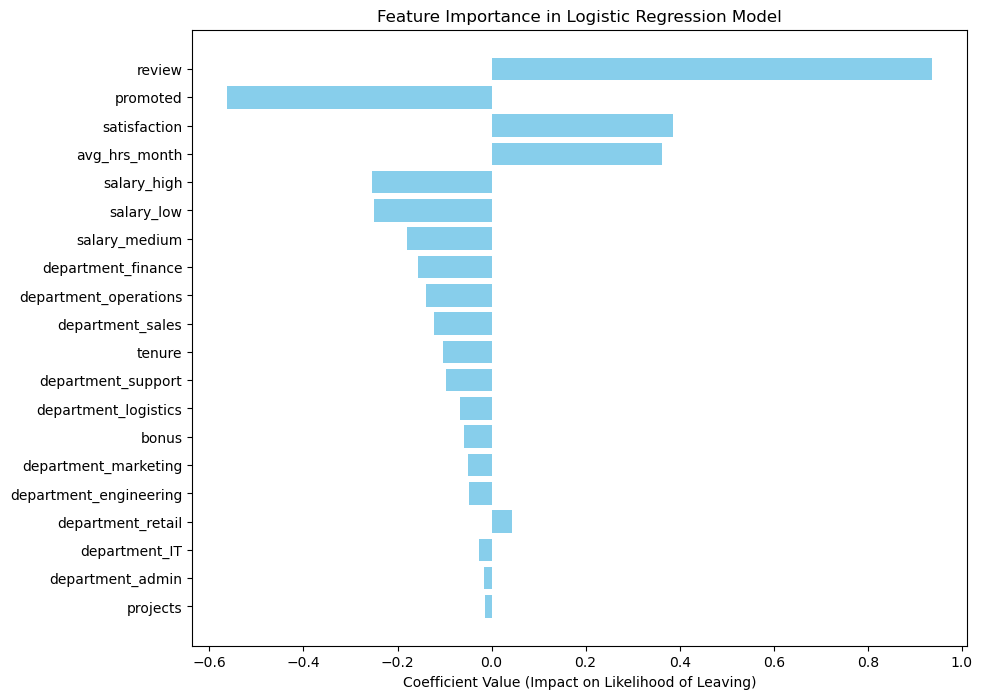

In [11]:
# Plotting feature importance for the logistic regression model
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_logistic['Feature'], feature_importance_logistic['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value (Impact on Likelihood of Leaving)')
plt.title('Feature Importance in Logistic Regression Model')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [12]:
#Positive Coefficients increase the likelihood of an employee leaving. Features like review and avg_hrs_month with positive coefficients suggest that higher values in these areas correlate with a greater likelihood of leaving.
#Negative Coefficients decrease the likelihood of an employee leaving. For example, the promoted feature has a negative coefficient, indicating that employees who are promoted are less likely to leave.

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Step 2: Fitting the model on the training data
decision_tree_model.fit(X_train, y_train)

# Step 3: Predicting and evaluating the model
y_pred_tree = decision_tree_model.predict(X_train)
accuracy_tree = accuracy_score(y_train, y_pred_tree)
classification_report_tree = classification_report(y_train, y_pred_tree)

print(accuracy_tree) 
print(classification_report_tree)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5426
           1       1.00      1.00      1.00      2206

    accuracy                           1.00      7632
   macro avg       1.00      1.00      1.00      7632
weighted avg       1.00      1.00      1.00      7632



In [24]:
decision_tree_model2 = DecisionTreeClassifier(random_state=42)

decision_tree_model2.fit(X_test, y_test)

y_pred_tree_test = decision_tree_model2.predict(X_test)
accuracy_tree_test = accuracy_score(y_test, y_pred_tree_test)
classification_report_test = classification_report(y_test, y_pred_tree_test)

print(accuracy_tree)
print(classification_report_test)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1330
           1       1.00      1.00      1.00       578

    accuracy                           1.00      1908
   macro avg       1.00      1.00      1.00      1908
weighted avg       1.00      1.00      1.00      1908



In [14]:
import pydotplus
from IPython.display import Image
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

In [15]:
dot_data = tree.export_graphviz(
    decision_tree_model, out_file=None, feature_names=X_train.columns, class_names=["Stay", "Leave"], filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.675525 to fit



In [16]:
# Extracting feature importance
feature_importances = pd.DataFrame(decision_tree_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head(10)  # Display the top 10 most important features

importance
satisfaction              0.323321
avg_hrs_month             0.313485
review                    0.251476
projects                  0.013022
department_sales          0.010228
department_engineering    0.010181
bonus                     0.009250
salary_high               0.009229
department_marketing      0.007781
salary_medium             0.006871

In [17]:
#Satisfaction (32.33%): The most important feature. Lower satisfaction levels might be a significant predictor of employees leaving.
#Average Hours per Month (31.35%): Nearly as influential as satisfaction, indicating that the number of hours worked can significantly impact an employee's decision to leave.
#Review (25.15%): Performance review scores also play a crucial role, with higher or lower scores possibly affecting turnover decisions.

In [18]:
from sklearn.utils import resample

In [19]:
# Combine the training data back for resampling
X_train_res = pd.DataFrame(X_train, columns=X.columns)
y_train_res = pd.Series(y_train)
train_data_res = pd.concat([X_train_res, y_train_res], axis=1)

# Separate majority and minority classes
majority = train_data_res[train_data_res.left == 0]
minority = train_data_res[train_data_res.left == 1]

# Downsample majority class
majority_downsampled = resample(majority,
                                replace=False,    # sample without replacement
                                n_samples=len(minority),  # to match minority class
                                random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
balanced_data = pd.concat([majority_downsampled, minority])

# Split the balanced data into features and target
X_train_balanced = balanced_data.drop('left', axis=1)
y_train_balanced = balanced_data['left']

# Check new class distribution
y_train_balanced.value_counts()

left
0    2206
1    2206
Name: count, dtype: int64

In [20]:
train_data_res

promoted    review  projects    tenure  satisfaction  bonus  \
5875         0 -1.091384 -0.474599  1.020106      0.405755      0   
5006         0 -0.607243  1.252203  1.020106     -0.798322      0   
81           0 -0.129692  1.252203 -0.392964      0.768927      0   
1323         0 -0.356061 -0.474599  0.313571      0.932455      1   
9514         0  0.153435 -0.474599  1.020106     -0.370308      0   
...        ...       ...       ...       ...           ...    ...   
5734         0 -0.420135  1.252203  0.313571     -0.220691      0   
5191         0 -0.027446  1.252203  0.313571     -0.743771      0   
5390         0 -0.942817  1.252203  0.313571     -0.350107      0   
860          0  0.052769 -0.474599 -1.099499      0.077077      0   
7270         0 -0.601003  1.252203 -0.392964     -1.625260      0   

      avg_hrs_month  department_IT  department_admin  department_engineering  \
5875       1.017490          False             False                   False   
5006       1.159863          False             False                   False   
81        -0.495038          False             False                   False   
1323       0.100198          False             False                   False   
9514       1.105735          False              True                   False   
...             ...            ...               ...                     ...   
5734       0.372456          False             False                   False   
5191       0.387262          False             False                   False   
5390       0.120994          False             False                   False   
860       -1.090884          False             False                   False   
7270      -0.115865          False             False                   False   

      ...  department_logistics  department_marketing  department_operations  \
5875  ...                 False                 False                  False   
5006  ...                 False                 False                   True   
81    ...                 False                 False                  False   
1323  ...                 False                 False                   True   
9514  ...                 False                 False                  False   
...   ...                   ...                   ...                    ...   
5734  ...                 False                 False                  False   
5191  ...                 False                 False                  False   
5390  ...                 False                 False                  False   
860   ...                 False                 False                  False   
7270  ...                 False                 False                  False   

      department_retail  department_sales  department_support  salary_high  \
5875              False             False                True        False   
5006              False             False               False        False   
81                 True             False               False        False   
1323              False             False               False        False   
9514              False             False               False        False   
...                 ...               ...                 ...          ...   
5734               True             False               False         True   
5191              False              True               False        False   
5390               True             False               False        False   
860               False             False               False        False   
7270              False              True               False         True   

      salary_low  salary_medium  left  
5875       False           True     0  
5006       False           True     0  
81         False           True     0  
1323       False           True     0  
9514        True          False     1  
...          ...            ...   ...  
5734       False          False     0 

In [21]:
# Retrain the logistic regression model on the balanced dataset
log_reg_balanced = LogisticRegression(random_state=42)
log_reg_balanced.fit(X_train_balanced, y_train_balanced)

# Predict on the testing data using the balanced model
y_pred_balanced = log_reg_balanced.predict(X_test)

#accuracy
y_acc_balanced = accuracy_score(y_test, y_pred_balanced)

# Generate a classification report for the balanced model
classification_report_balanced = classification_report(y_test, y_pred_balanced)

print(y_acc_balanced)
print(classification_report_balanced)

0.6624737945492662
              precision    recall  f1-score   support

           0       0.84      0.64      0.72      1330
           1       0.46      0.72      0.56       578

    accuracy                           0.66      1908
   macro avg       0.65      0.68      0.64      1908
weighted avg       0.73      0.66      0.68      1908



In [25]:
X_train

promoted    review  projects    tenure  satisfaction  bonus  \
5875         0 -1.091384 -0.474599  1.020106      0.405755      0   
5006         0 -0.607243  1.252203  1.020106     -0.798322      0   
81           0 -0.129692  1.252203 -0.392964      0.768927      0   
1323         0 -0.356061 -0.474599  0.313571      0.932455      1   
9514         0  0.153435 -0.474599  1.020106     -0.370308      0   
...        ...       ...       ...       ...           ...    ...   
5734         0 -0.420135  1.252203  0.313571     -0.220691      0   
5191         0 -0.027446  1.252203  0.313571     -0.743771      0   
5390         0 -0.942817  1.252203  0.313571     -0.350107      0   
860          0  0.052769 -0.474599 -1.099499      0.077077      0   
7270         0 -0.601003  1.252203 -0.392964     -1.625260      0   

      avg_hrs_month  department_IT  department_admin  department_engineering  \
5875       1.017490          False             False                   False   
5006       1.159863          False             False                   False   
81        -0.495038          False             False                   False   
1323       0.100198          False             False                   False   
9514       1.105735          False              True                   False   
...             ...            ...               ...                     ...   
5734       0.372456          False             False                   False   
5191       0.387262          False             False                   False   
5390       0.120994          False             False                   False   
860       -1.090884          False             False                   False   
7270      -0.115865          False             False                   False   

      department_finance  department_logistics  department_marketing  \
5875               False                 False                 False   
5006               False                 False                 False   
81                 False                 False                 False   
1323               False                 False                 False   
9514               False                 False                 False   
...                  ...                   ...                   ...   
5734               False                 False                 False   
5191               False                 False                 False   
5390               False                 False                 False   
860                 True                 False                 False   
7270               False                 False                 False   

      department_operations  department_retail  department_sales  \
5875                  False              False             False   
5006                   True              False             False   
81                    False               True             False   
1323                   True              False             False   
9514                  False              False             False   
...                     ...                ...               ...   
5734                  False               True             False   
5191                  False              False              True   
5390                  False               True             False   
860                   False              False             False   
7270                  False              False              True   

      department_support  salary_high  salary_low  salary_medium  
5875                True        False       False           True  
5006               False        False       False           True  
81                 False        False       False           True  
1323               False        False       False           True  
9514               False        False        True          False  
...                  ...          ...         ...            ...  
5734               False         True       False          False 

In [26]:
y_train

5875    0
5006    0
81      0
1323    0
9514    1
       ..
5734    0
5191    0
5390    0
860     0
7270    0
Name: left, Length: 7632, dtype: int64

In [27]:
X_test

promoted    review  projects    tenure  satisfaction  bonus  \
3833         0  1.071857 -0.474599 -0.392964     -0.955561      0   
4215         0  1.425647 -0.474599 -0.392964     -0.780532      0   
8277         0 -3.287489 -0.474599  0.313571      1.316396      0   
1578         0  0.193759 -0.474599 -1.099499      1.038867      0   
6341         0  0.752005  1.252203  0.313571     -0.766300      1   
...        ...       ...       ...       ...           ...    ...   
8314         0 -0.953358 -0.474599  0.313571      1.372129      0   
4048         0  1.077565  1.252203 -0.392964     -0.937715      0   
6678         0 -0.204043 -0.474599  1.726642      0.388170      0   
7666         0 -0.460040 -2.201401  0.313571     -1.222917      1   
4029         0  0.751299 -0.474599 -0.392964     -0.446954      0   

      avg_hrs_month  department_IT  department_admin  department_engineering  \
3833      -0.365370          False             False                   False   
4215      -0.591581          False             False                   False   
8277       0.419017          False             False                   False   
1578      -0.908728          False             False                   False   
6341       0.419690          False             False                    True   
...             ...            ...               ...                     ...   
8314       0.516271          False             False                   False   
4048      -0.380794          False             False                    True   
6678       1.684830          False             False                   False   
7666       0.502304          False             False                   False   
4029      -0.558198          False             False                   False   

      department_finance  department_logistics  department_marketing  \
3833               False                 False                 False   
4215               False                 False                 False   
8277               False                 False                 False   
1578               False                 False                  True   
6341               False                 False                 False   
...                  ...                   ...                   ...   
8314               False                 False                 False   
4048               False                 False                 False   
6678               False                 False                 False   
7666               False                 False                 False   
4029               False                 False                 False   

      department_operations  department_retail  department_sales  \
3833                  False              False             False   
4215                  False              False             False   
8277                  False              False              True   
1578                  False              False             False   
6341                  False              False             False   
...                     ...                ...               ...   
8314                  False              False              True   
4048                  False              False             False   
6678                   True              False             False   
7666                   True              False             False   
4029                  False               True             False   

      department_support  salary_high  salary_low  salary_medium  
3833                True        False       False           True  
4215                True        False       False           True  
8277               False        False       False           True  
1578               False        False       False           True  
6341               False        False       False           True  
...                  ...          ...         ...            ...  
8314               False        False       False           True 

In [28]:
y_test

3833    1
4215    1
8277    1
1578    0
6341    0
       ..
8314    1
4048    1
6678    0
7666    0
4029    1
Name: left, Length: 1908, dtype: int64